In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import catboost
import lightgbm
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df_train.describe()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,53236.000000,53236.000000,5.323600e+04,53172.000000,53172.000000,53172.000000,51260.000000,53236.000000,53236.000000,53236.000000
mean,0.314407,18850.101172,2.096828e+05,0.250019,0.077240,0.060652,99.062739,10.879198,10875.163423,0.937956
std,0.334858,5217.117568,5.763242e+05,0.696721,0.436435,0.314925,0.746464,5.168850,9318.368252,0.241239
min,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.960000,2.000000,1200.000000,0.000000
25%,0.034000,14974.000000,1.076000e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,0.167000,18625.000000,1.659600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,0.539000,22636.000000,2.509900e+05,0.000000,0.000000,0.000000,99.530000,14.000000,13800.000000,1.000000
max,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [4]:
df_train.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
2,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
3,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
4,1.000,24829,118400,0.0,0.0,0.0,99.05,11,B,Urban,7500,1


### Labeling categorical parameters

only sourcing_channel and residence_area_type are categorical data types in this data set.

In [10]:

for col in df_train.columns:
    le = LabelEncoder()
    if df_train[col].dtype == 'object':
        df_train[col] = le.fit_transform(df_train[col]) 
        df_test[col] = le.transform(df_test[col])

df_train.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,1,3300,1
1,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,0,3300,0
2,0.049,15341,250510,0.0,0.0,0.0,99.57,9,0,1,9600,1
3,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,1,9600,1
4,1.000,24829,118400,0.0,0.0,0.0,99.05,11,1,1,7500,1


### Chcking data quality

In [12]:
df_train.isnull().any()

perc_premium_paid_by_cash_credit    False
age_in_days                         False
Income                              False
Count_3.6_months_late                True
Count_6.12_months_late               True
Count_more_than_12_months_late       True
application_underwriting_score       True
no_of_premiums_paid                 False
sourcing_channel                    False
residence_area_type                 False
premium                             False
renewal                             False
dtype: bool

In [14]:
np.where(df_train.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [16]:
df_train.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3.6_months_late                 64
Count_6.12_months_late                64
Count_more_than_12_months_late        64
application_underwriting_score      1976
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [33]:
X = df_train.drop('renewal', axis = 1)
y = df_train['renewal']

0    1
1    0
2    1
3    1
4    1
Name: renewal, dtype: int64

In [55]:
seed = 2021
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)
# preparing validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5)

# fit model on training data
xgb_model = XGBClassifier(random_state=2020, n_estimators=2000, max_depth=8, colsample_bytree=0.85, missing=None,
                          scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], early_stopping_rounds=10, verbose=150 )


[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68952	validation_1-logloss:0.68953
[150]	validation_0-logloss:0.44046	validation_1-logloss:0.44327
[300]	validation_0-logloss:0.37712	validation_1-logloss:0.38415
[450]	validation_0-logloss:0.35073	validation_1-logloss:0.36314
[600]	validation_0-logloss:0.33622	validation_1-logloss:0.35334
[750]	validation_0-logloss:0.32579	validation_1-logloss:0.34658
[900]	validation_0-logloss:0.31624	validation_1-logloss:0.34097
[1050]	validation_0-logloss:0.30846	validation_1-logloss:0.33636
[1200]	validation_0-logloss:0.30135	validation_1-logloss:0.33222
[1350]	validation_0-logloss:0.29485	validation_1-logloss:0.32832
[1500]	validation_0-logloss:0.28784	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.008, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=2000, n_jobs=8, num_parallel_tree=1,
              random_state=2020, reg_alpha=2.01, reg_lambda=0.05,
              scale_pos_weight=0.1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=1)

### trained model accuracy

pos_label : str or int, 1 by default
    The class to report if ``average='binary'`` and the data is binary.
    If the data are multiclass or multilabel, this will be ignored;
    setting ``labels=[pos_label]`` and ``average != 'binary'`` will report
    scores for that label only.

In [57]:
predictions_xgb = xgb_model.predict(X_test)
predictions_xgb 

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [58]:
accuracy_score(y_test, predictions_xgb)

0.878522229179712

In [59]:
f1_score(y_test, predictions_xgb, pos_label=1)

0.9327789327789326

In [60]:
f1_score(y_test, predictions_xgb, pos_label=0)

0.3701298701298702

### Train xgboost model with cross validation

More detail available at [link](https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/).

In [61]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xgb_model, X, y, cv=kfold) # scoring='accuracy'

[15:36:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [62]:
# using average of all folds' accuracy as out-of-sample accuracy
results.mean()

0.8743707438609338

In [65]:
xgb_model = XGBClassifier(random_state=2020, n_estimators=2000, max_depth=8, colsample_bytree=0.85, missing=None,
                          scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)


# X: feature matrix
# y: target value
ff1 = []
ff2 = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], verbose=250, early_stopping_rounds=10)
    pred = xgb_model.predict(X_test)
    ff1.append(f1_score(y_test, pred, pos_label=0))
    ff2.append(f1_score(y_test, pred, pos_label=1))
ff1_mean = ff1.mean()
ff2_mean = ff2.mean()

[16:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68942	validation_1-logloss:0.68950
[250]	validation_0-logloss:0.38673	validation_1-logloss:0.39753
[500]	validation_0-logloss:0.34189	validation_1-logloss:0.36051
[750]	validation_0-logloss:0.32423	validation_1-logloss:0.34875
[1000]	validation_0-logloss:0.31052	validation_1-logloss:0.34013
[1250]	validation_0-logloss:0.29787	validation_1-logloss:0.33296
[1500]	validation_0-logloss:0.28679	validation_1-logloss:0.32658
[1750]	validation_0-logloss:0.27719	validation_1-logloss:0.32123
[1999]	validation_0-logloss:0.26784	validation_1-logloss:0.31594
[16:22:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting 

AttributeError: 'list' object has no attribute 'mean'

In [66]:
ff1

[0.3697560975609756,
 0.39245283018867927,
 0.34096444227959083,
 0.36168132942326486,
 0.3401496259351621]

### Feature importance of xgboost model

In [67]:
xgb_model.feature_importances_

array([0.11077998, 0.02295998, 0.0210686 , 0.17539798, 0.41342306,
       0.15846011, 0.0231732 , 0.02247528, 0.0177384 , 0.01647643,
       0.01804698], dtype=float32)

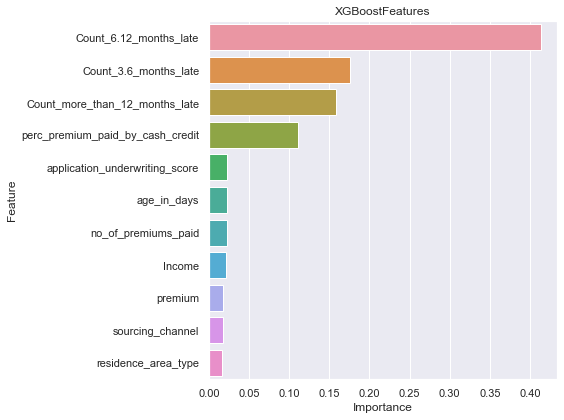

In [71]:
imp = pd.DataFrame({'Importance':xgb_model.feature_importances_,'Feature':X.columns})
plt.figure(figsize=(8, 6))
sns.set(font_scale = 1)
sns.barplot(x="Importance", y="Feature", data=imp.sort_values(by="Importance", ascending=False))
plt.title('XGBoostFeatures')
plt.tight_layout()
plt.show()

In [70]:
imp

,Importance,Feature
0,0.110780,perc_premium_paid_by_cash_credit
1,0.022960,age_in_days
2,0.021069,Income
3,0.175398,Count_3.6_months_late
4,0.413423,Count_6.12_months_late
5,0.158460,Count_more_than_12_months_late
6,0.023173,application_underwriting_score
7,0.022475,no_of_premiums_paid
8,0.017738,sourcing_channel
9,0.016476,residence_area_type


In [87]:
xgb_model = XGBClassifier(random_state=2020, n_estimators=2000, max_depth=8, colsample_bytree=0.85, missing=None,
                          scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)


ff1 = []
ff2 = []
kf = KFold(n_splits=5)
importance = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], verbose=250, early_stopping_rounds=10)
    
    imp = pd.DataFrame({'Importance':xgb_model.feature_importances_,'Feature':X.columns})
    importance.append(imp)    


[16:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68942	validation_1-logloss:0.68950
[250]	validation_0-logloss:0.38673	validation_1-logloss:0.39753
[500]	validation_0-logloss:0.34189	validation_1-logloss:0.36051
[750]	validation_0-logloss:0.32423	validation_1-logloss:0.34875
[1000]	validation_0-logloss:0.31052	validation_1-logloss:0.34013
[1250]	validation_0-logloss:0.29787	validation_1-logloss:0.33296
[1500]	validation_0-logloss:0.28679	validation_1-logloss:0.32658
[1750]	validation_0-logloss:0.27719	validation_1-logloss:0.32123
[1999]	validation_0-logloss:0.26784	validation_1-logloss:0.31594
[16:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting 

In [88]:
importance

[    Importance                           Feature
 0     0.116234  perc_premium_paid_by_cash_credit
 1     0.023233                       age_in_days
 2     0.021367                            Income
 3     0.197811             Count_3.6_months_late
 4     0.371811            Count_6.12_months_late
 5     0.166147    Count_more_than_12_months_late
 6     0.023634    application_underwriting_score
 7     0.024310               no_of_premiums_paid
 8     0.018808                  sourcing_channel
 9     0.017828               residence_area_type
 10    0.018817                           premium,
     Importance                           Feature
 0     0.116575  perc_premium_paid_by_cash_credit
 1     0.023246                       age_in_days
 2     0.020691                            Income
 3     0.171118             Count_3.6_months_late
 4     0.416508            Count_6.12_months_late
 5     0.147602    Count_more_than_12_months_late
 6     0.023368    application_underwriting_score

In [93]:
tmp_df = pd.merge(importance[0], importance[1], left_on='Feature', 
                  right_on='Feature')[['Feature', 'Importance_x', 'Importance_y']]
for i in range(2, len(importance)):
    tmp_df = pd.merge(tmp_df, importance[i], left_on='Feature', 
                      right_on='Feature')

tmp_df

,Feature,Importance_x,Importance_y,Importance_x,Importance_y,Importance
0,perc_premium_paid_by_cash_credit,0.116234,0.116575,0.109573,0.108813,0.110780
1,age_in_days,0.023233,0.023246,0.022711,0.021833,0.022960
2,Income,0.021367,0.020691,0.020086,0.020015,0.021069
3,Count_3.6_months_late,0.197811,0.171118,0.182669,0.172925,0.175398
4,Count_6.12_months_late,0.371811,0.416508,0.425327,0.438619,0.413423
5,Count_more_than_12_months_late,0.166147,0.147602,0.139041,0.134624,0.158460
6,application_underwriting_score,0.023634,0.023368,0.023021,0.023398,0.023173
7,no_of_premiums_paid,0.024310,0.023655,0.022708,0.023065,0.022475
8,sourcing_channel,0.018808,0.020130,0.018049,0.020059,0.017738
9,residence_area_type,0.017828,0.018452,0.018660,0.018853,0.016476


In [78]:
importance[0].merge(importance[1], )

,Importance,Feature


In [84]:
tmp_df = pd.merge(importance[0], importance[1], left_on='Feature', 
                  right_on='Feature')[['Feature', 'Importance_x', 'Importance_y']]
tmp_df

,Feature,Importance_x,Importance_y
0,perc_premium_paid_by_cash_credit,0.113755,0.093420
1,age_in_days,0.025773,0.023201
2,Income,0.024175,0.020530
3,Count_3.6_months_late,0.169130,0.172824
4,Count_6.12_months_late,0.398314,0.458158
5,Count_more_than_12_months_late,0.152119,0.135576
6,application_underwriting_score,0.026716,0.023525
7,no_of_premiums_paid,0.025001,0.022528
8,sourcing_channel,0.022627,0.016940
9,residence_area_type,0.021802,0.016384


In [86]:
tmp_df.mean(axis=1)

0     0.103588
1     0.024487
2     0.022353
3     0.170977
4     0.428236
5     0.143847
6     0.025120
7     0.023764
8     0.019783
9     0.019093
10    0.018751
dtype: float32